In [35]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as mp

In [11]:
# Read in track metadata with genre labels
tracks = pd.read_csv('fma-rock-vs-hiphop.csv')

In [13]:
# Read in track metrics with the features
echonest_metrics = pd.read_json('echonest-metrics.json',precise_float=True)

In [14]:
# Merge the relevant columns of tracks and echonest_metrics
echo_tracks = echonest_metrics.merge(tracks[['track_id','genre_top']],on='track_id')

# Exploratory Data Analysis

In [15]:
print(echo_tracks.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4801
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   acousticness      4802 non-null   float64
 2   danceability      4802 non-null   float64
 3   energy            4802 non-null   float64
 4   instrumentalness  4802 non-null   float64
 5   liveness          4802 non-null   float64
 6   speechiness       4802 non-null   float64
 7   tempo             4802 non-null   float64
 8   valence           4802 non-null   float64
 9   genre_top         4802 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 412.7+ KB
None


In [16]:
print(echo_tracks.describe())

            track_id  acousticness  danceability       energy  \
count    4802.000000  4.802000e+03   4802.000000  4802.000000   
mean    30164.871720  4.870600e-01      0.436556     0.625126   
std     28592.013796  3.681396e-01      0.183502     0.244051   
min         2.000000  9.491000e-07      0.051307     0.000279   
25%      7494.250000  8.351236e-02      0.296047     0.450757   
50%     20723.500000  5.156888e-01      0.419447     0.648374   
75%     44240.750000  8.555765e-01      0.565339     0.837016   
max    124722.000000  9.957965e-01      0.961871     0.999768   

       instrumentalness     liveness  speechiness        tempo      valence  
count       4802.000000  4802.000000  4802.000000  4802.000000  4802.000000  
mean           0.604096     0.187997     0.104877   126.687944     0.453413  
std            0.376487     0.150562     0.145934    34.002473     0.266632  
min            0.000000     0.025297     0.023234    29.093000     0.014392  
25%            0.164972 

In [17]:
print(echo_tracks.value_counts())

track_id  acousticness  danceability  energy    instrumentalness  liveness  speechiness  tempo    valence   genre_top
2         0.416675      0.675894      0.634476  1.062807e-02      0.177647  0.159310     165.922  0.576661  Hip-Hop      1
36483     0.770043      0.314475      0.697801  9.443719e-01      0.101764  0.039747     140.928  0.582536  Rock         1
36481     0.459856      0.330650      0.884761  9.018685e-01      0.096685  0.039240     154.035  0.399537  Rock         1
36400     0.893667      0.234548      0.462373  4.308926e-01      0.215122  0.087473     81.513   0.436996  Rock         1
36399     0.643173      0.338126      0.729200  5.883389e-01      0.066064  0.181986     138.360  0.342177  Rock         1
                                                                                                                        ..
11881     0.840759      0.711450      0.729310  6.600307e-01      0.091702  0.679064     80.109   0.375561  Hip-Hop      1
11880     0.460377   

In [18]:
print(echo_tracks.duplicated().sum())

0


In [19]:
print(echo_tracks.isnull().sum())

track_id            0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
speechiness         0
tempo               0
valence             0
genre_top           0
dtype: int64


# Relationship between Variables

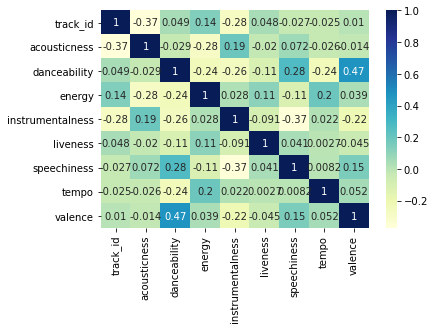

In [38]:
# Create a correlation matrix
dataplot=sn.heatmap(echo_tracks.corr(), cmap="YlGnBu",annot=True)
  
# displaying heatmap
mp.show()

# Normalizing the feature data

In [21]:
# Define our features 
features = echo_tracks.drop(['genre_top','track_id'],axis=1)

# Define our labels
labels = echo_tracks['genre_top']
# Import the StandardScaler
from sklearn.preprocessing import StandardScaler

# Scale the features and set the values to a new variable
scaler = StandardScaler()
scaled_train_features = scaler.fit_transform(features)

# Principal Component Analysis

Text(0.5, 0, 'Principal Component #')

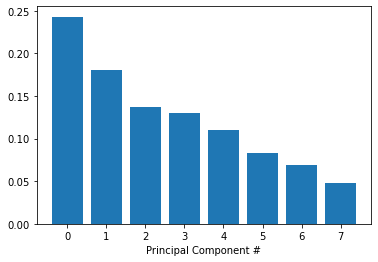

In [22]:
# This is just to make plots appear in the notebook
%matplotlib inline

# Import  and PCA class
from sklearn.decomposition import PCA

# Get our explained variance ratios from PCA using all features
pca = PCA()
pca.fit(scaled_train_features)
exp_variance = pca.explained_variance_ratio_ 

# plot the explained variance using a barplot
fig, ax = plt.subplots()
ax.bar(range(pca.n_components_),exp_variance)
ax.set_xlabel('Principal Component #')

# Further visualization of PCA

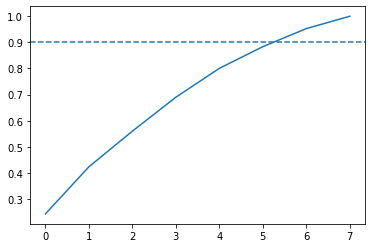

In [23]:
# Calculate the cumulative explained variance
cum_exp_variance = np.cumsum(exp_variance)

# Plot the cumulative explained variance and draw a dashed line at 0.90.
fig, ax = plt.subplots()
ax.plot(cum_exp_variance)
ax.axhline(y=0.9, linestyle='--')
### Finding indice where cum_exp_variance exceeds 0.9 and adding 1 to that indice to get n_components
n_components = ((np.where(cum_exp_variance > 0.9))[0][0]) 


# Perform PCA with the chosen number of components and project data onto components
pca = PCA(n_components, random_state=10)
pca.fit(scaled_train_features)
pca_projection = pca.transform(scaled_train_features)

# Training the dataset

In [32]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Split our data
train_features, test_features, train_labels, test_labels = train_test_split(pca_projection, labels,random_state=10)

logreg = LogisticRegression(random_state=10)
logreg.fit(train_features,train_labels)
pred_labels_logit = logreg.predict(test_features)

class_rep_log = classification_report(test_labels,pred_labels_logit)

print("Logistic Regression: \n", class_rep_log)

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.77      0.54      0.64       235
        Rock       0.90      0.96      0.93       966

    accuracy                           0.88      1201
   macro avg       0.83      0.75      0.78      1201
weighted avg       0.87      0.88      0.87      1201

